In [95]:
!pip install seaborn

In [96]:
!pip list

Package                   Version
------------------------- ------------
anyio                     4.2.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.11.0
beautifulsoup4            4.12.2
bleach                    4.1.0
Bottleneck                1.3.5
branca                    0.6.0
Brotli                    1.0.9
certifi                   2023.11.17
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.1.2
contourpy                 1.2.0
cryptography              41.0.7
cycler                    0.11.0
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
executing                 0.8.3
fastjsonschema            2.16.2
folium                    0.14.0
fonttools                 4.25.0
idna           

# Import libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# 1. Data Preparation

## 1.1 import dataset

In [98]:
uncleaned_df = pd.read_csv("dataset.csv")
uncleaned_df.head(10)

C:\Users\sabin\anaconda3\envs\traffic_patterns\Lib\site-packages\IPython\core\formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
C:\Users\sabin\anaconda3\envs\traffic_patterns\Lib\site-packages\IPython\core\formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
0,1249781,2011,8,4,23,18,3,43.651545,-79.383490,Toronto Centre-Rosedale (27),...,0,1,0,0,0,0,0,0,0,0
1,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
2,5002235651,2015,12,30,23,39,2,43.682342,-79.328266,Toronto-Danforth (30),...,0,0,0,0,0,1,0,0,0,1
3,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
4,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
5,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
6,7001903704,2017,10,20,23,18,4,43.625201,-79.528515,Etobicoke-Lakeshore (5),...,0,0,0,0,0,1,0,0,0,0
7,7001903704,2017,10,20,23,18,4,43.625201,-79.528515,Etobicoke-Lakeshore (5),...,0,0,0,0,0,1,0,0,0,0
8,1095752,2009,2,26,23,19,3,43.663245,-79.330190,Beaches-East York (32),...,0,0,0,0,0,1,0,0,0,0
9,1095752,2009,2,26,23,19,3,43.663245,-79.330190,Beaches-East York (32),...,0,0,0,0,0,1,0,0,0,0


In [99]:
uncleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ACCNUM         12557 non-null  int64  
 1   YEAR           12557 non-null  int64  
 2   MONTH          12557 non-null  int64  
 3   DAY            12557 non-null  int64  
 4   HOUR           12557 non-null  int64  
 5   MINUTES        12557 non-null  int64  
 6   WEEKDAY        12557 non-null  int64  
 7   LATITUDE       12557 non-null  float64
 8   LONGITUDE      12557 non-null  float64
 9   Ward_Name      12557 non-null  object 
 10  Ward_ID        12557 non-null  int64  
 11  Hood_Name      12557 non-null  object 
 12  Hood_ID        12557 non-null  int64  
 13  Division       12557 non-null  object 
 14  District       12557 non-null  object 
 15  STREET1        12557 non-null  object 
 16  STREET2        12557 non-null  object 
 17  OFFSET         12557 non-null  object 
 18  ROAD_C

# Dataset Description

ACCNUMAccident Number

YEAR Year of Accident

MONTH Month of Accident

DAY Day of Accident

HOUR Hour of Accident (24hrs)

MINUTES Minute of Accident

WEEKDAY Weekday of Accident (0 is Monday)

LATITUDE Latitude

LONGITUDE Longitude

Ward_NameCity Ward

Ward_IDCity Ward ID

Hood_NameNeighbourhood Name

Hood_IDNeighbourhood ID

DivisionPolice Division

DistrictCity District

STREET1Street of Accident

STREET2Street of Accident

OFFSETDistance and direction of the accident

ROAD_CLASSRoad Classification

LOCCOORDLocation Coordinate

ACCLOCAccident Location

TRAFFCTL Traffic Control Type

VISIBILITY Environment Condition

LIGHT Light Condition

RDSFCOND Road Surface Condition

ACCLASS Classification of Accident

IMPACTYPE Initial Impact Type

INVTYPE Involvement Type

INVAGE Age of Involved Party

INJURY Severity of Injury

FATAL_NO Sequential Number

INITDIR Initial Direction of Travel

VEHTYPE Type of Vehicle

MANOEUVER Vehicle Manouever

DRIVACT Apparent Driver Action

DRIVCOND Driver Condition

PEDTYPE Pedestrian Crash Type

PEDACT Pedestrian Action

PEDCOND Condition of Pedestrian

CYCLISTYPE Cyclist Crash Type

CYCACT Cyclist Action

CYCCOND Cyclist Condition

PEDESTRIAN Pedestrian Involved In Collision

CYCLIST Cyclists Involved in Collision

AUTOMOBILE Driver Involved in Collision

MOTORCYCLE Motorcyclist Involved in Collision

TRUCK Truck Driver Involved in Collision

TRSN_CITY_VEH Transit or City Vehicle Involved in Collision

EMERG_VEH Emergency Vehicle Involved in Collision

PASSENGER Passenger Involved in Collision

SPEEDINGSpeeding Related Collision

AG_DRIVAggressive and Distracted Driving Collision

REDLIGHT Red Light Related Collision

ALCOHOL Alcohol Related Collision

DISABILITY Medical or Physical Disability Related Collision

FATAL Fatal Injury in Collision

## 1.1 Data Cleaning

Replacing blank values to NA

In [100]:
df = uncleaned_df.replace(' ', np.nan, regex = False)
df.sample(10)

C:\Users\sabin\anaconda3\envs\traffic_patterns\Lib\site-packages\IPython\core\formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
8776,1289541,2012,2,11,3,5,5,43.722645,-79.326790,Don Valley West (26),...,0,0,0,1,1,1,0,0,0,0
4173,4003092212,2014,10,12,16,40,6,43.657024,-79.555233,Etobicoke Centre (3),...,0,0,1,1,0,1,1,0,0,0
12259,1279961,2012,2,10,18,50,4,43.769145,-79.552190,York West (7),...,0,0,0,1,1,1,0,0,0,0
2264,1275046,2012,1,15,9,6,6,43.716838,-79.259915,Scarborough Southwest (35),...,0,0,0,0,0,1,1,0,0,0
229,1026352,2008,2,4,22,50,0,43.604445,-79.519490,Etobicoke-Lakeshore (6),...,0,0,0,1,0,1,0,0,0,0
1540,4002786358,2014,8,27,12,5,2,43.755451,-79.438465,York Centre (10),...,0,1,0,1,0,0,0,0,0,0
1521,1219821,2011,2,23,12,3,2,43.740845,-79.344490,Don Valley West (25),...,0,0,0,0,0,1,0,0,0,0
2504,4003235849,2014,11,2,10,15,6,43.717487,-79.448963,Eglinton-Lawrence (15),...,0,0,0,0,0,1,0,0,0,0
4212,6001043780,2016,6,15,16,44,2,43.782928,-79.401058,Willowdale (23),...,0,0,0,0,0,0,0,0,0,0
3209,1388451,2013,11,4,20,9,0,43.698291,-79.396633,St. Paul's (22),...,0,0,0,1,0,1,0,0,0,0


### checking the missing values percentage

In [101]:
print(df.isnull().sum()/len(df)*100)

ACCNUM            0.000000
YEAR              0.000000
MONTH             0.000000
DAY               0.000000
HOUR              0.000000
MINUTES           0.000000
WEEKDAY           0.000000
LATITUDE          0.000000
LONGITUDE         0.000000
Ward_Name         0.000000
Ward_ID           0.000000
Hood_Name         0.000000
Hood_ID           0.000000
Division          0.000000
District          0.007964
STREET1           0.000000
STREET2           8.473361
OFFSET           88.428765
ROAD_CLASS        0.000000
LOCCOORD          0.676913
ACCLOC           37.508959
TRAFFCTL          0.191128
VISIBILITY        0.015927
LIGHT             0.015927
RDSFCOND          0.055746
ACCLASS           0.000000
IMPACTYPE         0.000000
INVTYPE           0.031855
INVAGE            0.000000
INJURY           48.164370
FATAL_NO          0.000000
INITDIR          30.166441
VEHTYPE          13.594011
MANOEUVER        43.346341
DRIVACT          50.617186
DRIVCOND         50.641077
PEDTYPE          83.937246
P

### removing the columns having missing values more than 80%

In [102]:
df_clean = df.drop(["OFFSET", "PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE", "CYCACT", "CYCCOND"], axis=1)

In [103]:
df_clean.shape

(12557, 49)

In [104]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ACCNUM         12557 non-null  int64  
 1   YEAR           12557 non-null  int64  
 2   MONTH          12557 non-null  int64  
 3   DAY            12557 non-null  int64  
 4   HOUR           12557 non-null  int64  
 5   MINUTES        12557 non-null  int64  
 6   WEEKDAY        12557 non-null  int64  
 7   LATITUDE       12557 non-null  float64
 8   LONGITUDE      12557 non-null  float64
 9   Ward_Name      12557 non-null  object 
 10  Ward_ID        12557 non-null  int64  
 11  Hood_Name      12557 non-null  object 
 12  Hood_ID        12557 non-null  int64  
 13  Division       12557 non-null  object 
 14  District       12556 non-null  object 
 15  STREET1        12557 non-null  object 
 16  STREET2        11493 non-null  object 
 17  ROAD_CLASS     12557 non-null  object 
 18  LOCCOO

In [105]:
df_clean['ACCLASS'].value_counts()

ACCLASS
Non-Fatal Injury        10829
Fatal                    1716
Property Damage Only       12
Name: count, dtype: int64

Here, in ACCCLASS column i.e classification of accident column, changing the column names from Property Damage Only and Non-fatal injury to Non-fatal.

In [106]:
df_clean['ACCLASS'] = np.where(df_clean['ACCLASS'] == 'Property Damage Only', 'Non Fatal', df_clean['ACCLASS'])
df_clean['ACCLASS'] = np.where(df_clean['ACCLASS'] == 'Non-Fatal Injury', 'Non Fatal', df_clean['ACCLASS'])

In [107]:
df_clean['ACCLASS'].unique()

array(['Non Fatal', 'Fatal'], dtype=object)

### changing object data type to categorical data

In [108]:
print(df_clean.select_dtypes(["object"]).columns)

Index(['Ward_Name', 'Hood_Name', 'Division', 'District', 'STREET1', 'STREET2',
       'ROAD_CLASS', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND'],
      dtype='object')


In [109]:
objdtype = df_clean.select_dtypes(["object"]).columns
df_clean[objdtype] = df_clean[objdtype].astype('category')

In [110]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ACCNUM         12557 non-null  int64   
 1   YEAR           12557 non-null  int64   
 2   MONTH          12557 non-null  int64   
 3   DAY            12557 non-null  int64   
 4   HOUR           12557 non-null  int64   
 5   MINUTES        12557 non-null  int64   
 6   WEEKDAY        12557 non-null  int64   
 7   LATITUDE       12557 non-null  float64 
 8   LONGITUDE      12557 non-null  float64 
 9   Ward_Name      12557 non-null  category
 10  Ward_ID        12557 non-null  int64   
 11  Hood_Name      12557 non-null  category
 12  Hood_ID        12557 non-null  int64   
 13  Division       12557 non-null  category
 14  District       12556 non-null  category
 15  STREET1        12557 non-null  category
 16  STREET2        11493 non-null  category
 17  ROAD_CLASS     12557 non-null  

# Exploratory Data Analysis

### Number of Accidents by Year

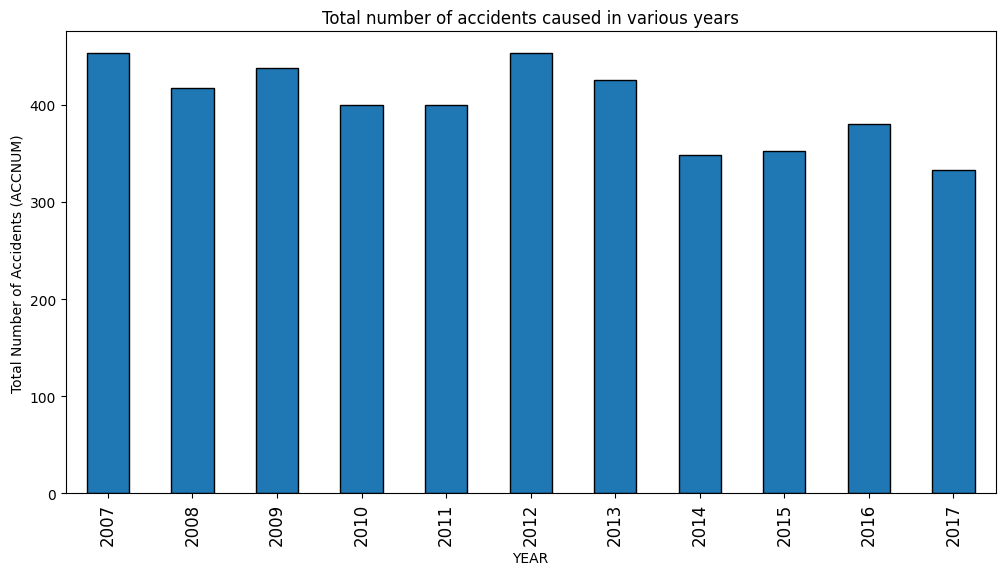

In [111]:
num_acc = df_clean.groupby('YEAR')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Total number of accidents caused in various years")
plt.ylabel('Total Number of Accidents (ACCNUM)')

ax = plt.gca()
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y')
num_acc.plot(kind='bar', edgecolor='black')
plt.show()

Here, we can see the accidents have slightly reduced over the period of 10 years.

### creating heatmap of accidents where injury is fatal

In [112]:
df_clean = df_clean[df_clean['INJURY'] == 'Fatal']
df_heat = df_clean[['LATITUDE', 'LONGITUDE', 'FATAL']]
latitude_toronto = df_heat.describe().at['mean','LATITUDE']
langitude_toronto = df_heat.describe().at['mean','LONGITUDE']
location = [latitude_toronto, langitude_toronto]
Fatal_map = folium.Map(location, zoom_start=10.455)
HeatMap(df_heat.values, min_opacity =0.3).add_to(Fatal_map)
Fatal_map

Here, from this heatmap, we can see that most of the fatal accidents have occurred in the Downtown area of toronto

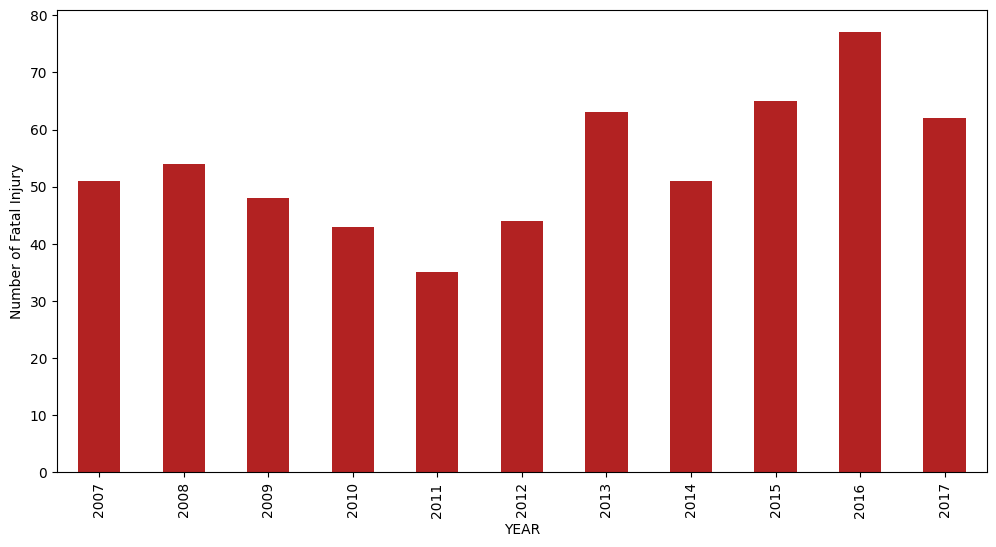

In [113]:
#Fatality over years (# of people died)
Fatal = df_clean[df_clean['INJURY'] =='Fatal']
Fatal = Fatal.groupby(df_clean['YEAR']).count()
plt.figure(figsize=(12,6))


plt.ylabel('Number of Fatal Injury')
Fatal['INJURY'].plot(kind='bar',color="firebrick")

plt.show()

fatal injury was highest in 2016

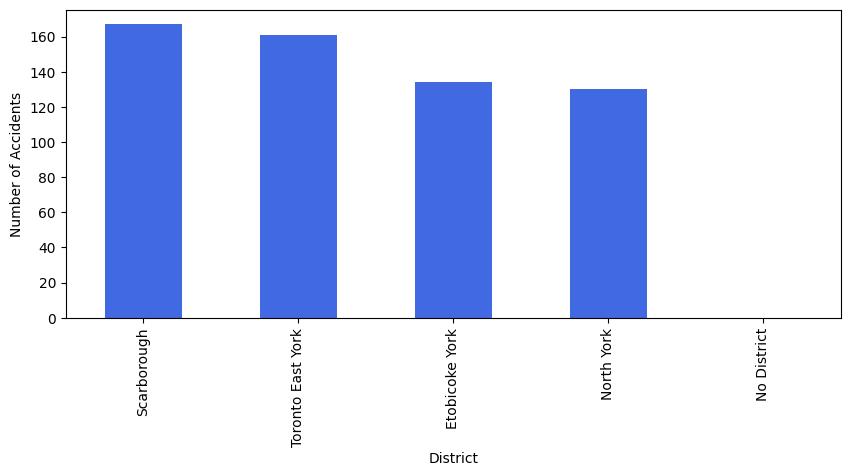

In [131]:
# Districts where most accident happens

Region_df_clean = df_clean['District'].value_counts()
plt.figure(figsize=(10,4))
plt.ylabel('Number of Accidents')
Region_df_clean.plot(kind='bar',color='royalblue')
plt.show()

### Driving condition VS accident caused by 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL'  for EDA.

C:\Users\sabin\AppData\Local\Temp\ipykernel_38228\42797064.py:1: FutureWarning: The provided callable <function sum at 0x000001A4F395F6A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_clean_pie = df_clean.pivot_table(index='YEAR',


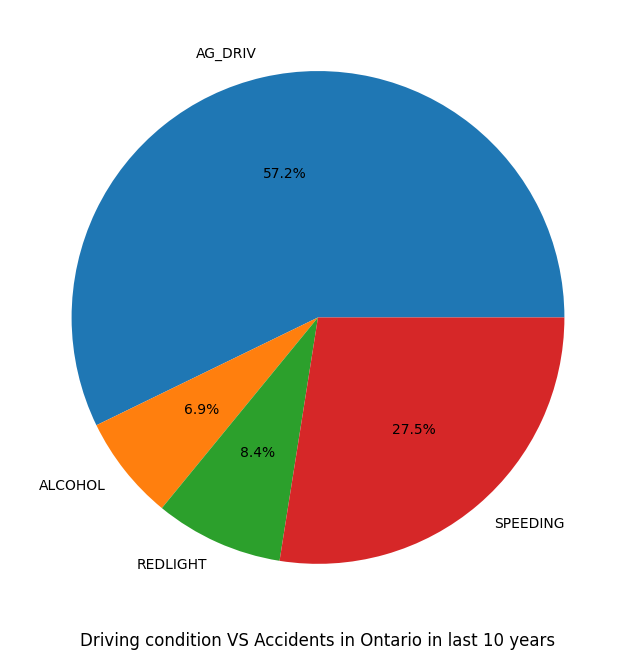

In [132]:
df_clean_pie = df_clean.pivot_table(index='YEAR', 
                           values = ['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL'],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(12,8))
df_clean_pie.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Driving condition VS Accidents in Ontario in last 10 years',fontsize=12) 
plt.show()

From the above chart, Aggressive and Distracted Driving is the major cause of accident contributing 57.2%, followed by sppeding 27.5%.

C:\Users\sabin\AppData\Local\Temp\ipykernel_38228\1337737599.py:1: FutureWarning: The provided callable <function sum at 0x000001A4F395F6A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_clean_type = df_clean.pivot_table(index='YEAR',


Text(0.5, 0, 'Vechile type VS Accidents in Ontario in last 10 years')

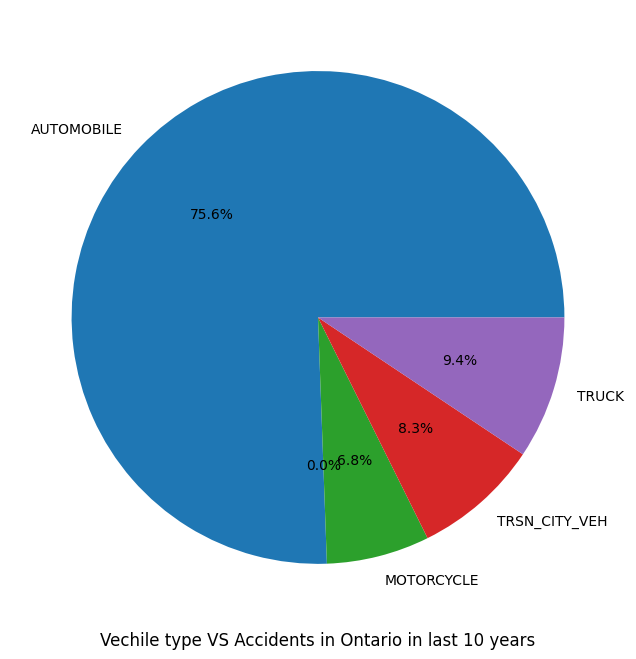

In [135]:
df_clean_type = df_clean.pivot_table(index='YEAR', 
                           values = [ 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH' ],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')

fig, ax1 = plt.subplots(figsize=(12,8))
df_clean_type.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Vechile type VS Accidents in Ontario in last 10 years',fontsize=12)

In [138]:
# df_clean_vech = df_clean.pivot_table(index='YEAR', 
#                                      values=['FATAL', 'DISABILITY'],
#                                      aggfunc=np.sum,
#                                      margins=True,
#                                      margins_name='Total Under Category')

# # Creating a stacked bar chart
# ax = df_clean_vech.iloc[:-1].plot(kind='bar', stacked=True, figsize=(12, 8))
# plt.title('Fatal and Disability Incidents vs. Total Accidents Over the Years', fontsize=16)
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('Count', fontsize=14)
# plt.legend(title='Incident Type', fontsize=12)
# plt.show()